In [22]:
!nvidia-smi

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Fri Jul 19 07:12:57 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             31W /  250W |    7643MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install diffusers
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.3 MB/s eta 0:00:00a 0:00:01


In [2]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, DiffusionPipeline
import torch
from diffusers import UniPCMultistepScheduler
from diffusers.utils import load_image
import cv2
from PIL import Image
import numpy as np

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-07-19 07:19:31.926063: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 07:19:31.926198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 07:19:32.073227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from transformers import pipeline,SamModel, SamProcessor
import torch 
generator = pipeline(
    task="mask-generation",
    model="facebook/sam-vit-base",
    processor="facebook/sam-vit-base",
    device=0,
    points_per_batch=256
)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [5]:
outputs = generator(image_path, points_per_batch = 256)
# outputs

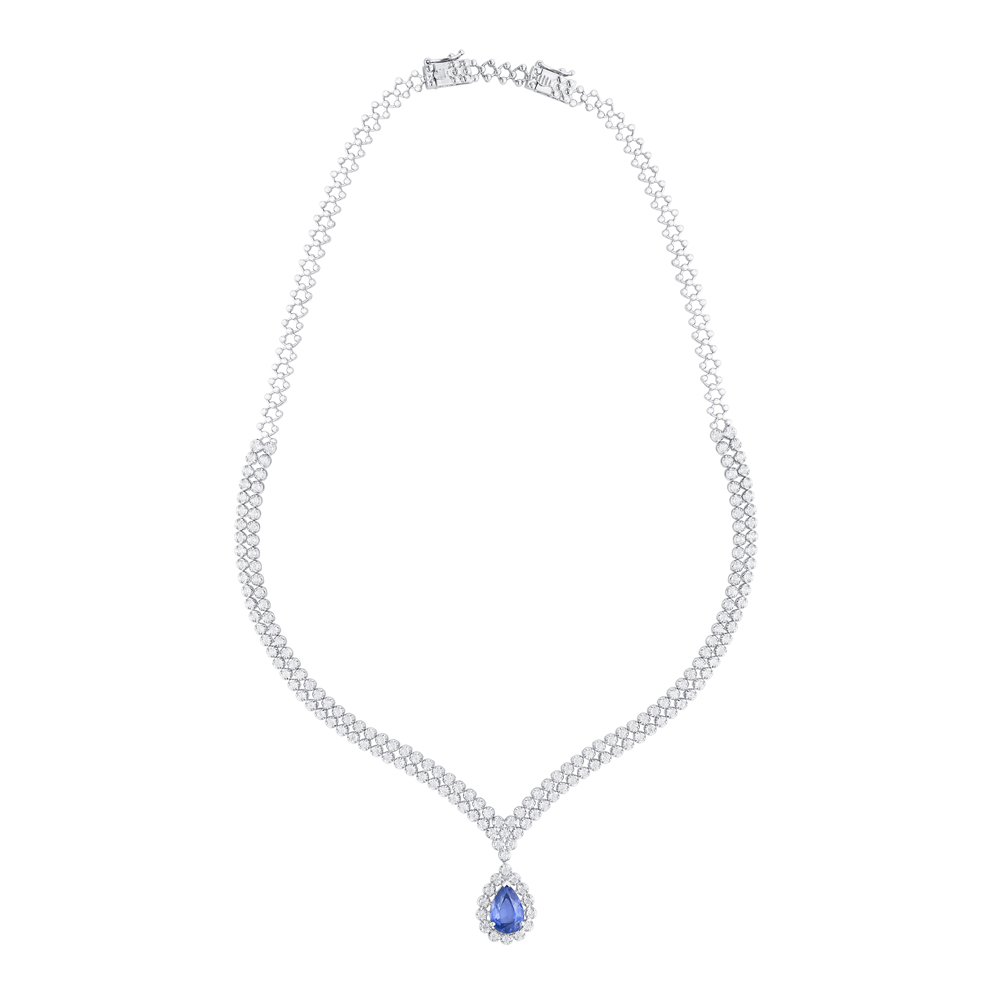

In [4]:
image_path = "/kaggle/input/jewelry/OSN23015_3.jpg"
image = Image.open(image_path)
image

<Figure size 640x480 with 0 Axes>

In [28]:
save_path=r"/kaggle/working/"
first_mask.save(save_path)

AttributeError: 'Tensor' object has no attribute 'save'

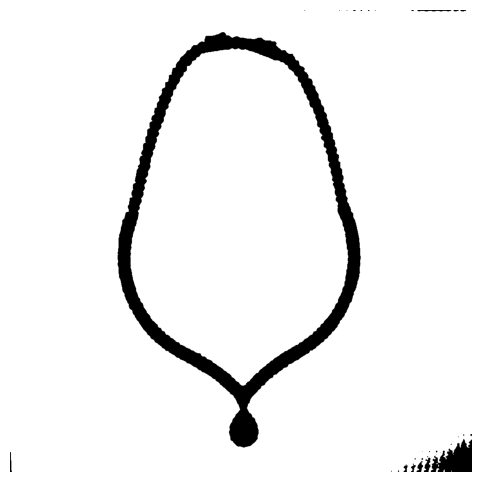

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


# Extract the first mask from the list
first_mask = outputs['masks'][0]
# Plot the mask
plt.figure(figsize=(6,6))
plt.imshow(first_mask, cmap='gray')  # Use a gray colormap to visualize the mask
plt.axis('off')  # Hide the axes
# Save the mask as a JPG image
plt.savefig("mask_image.jpg", format='jpg', bbox_inches='tight', pad_inches=0)
plt.show()



In [20]:
prompt = '''Generate black color background'''
neg_prompt = "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"

In [25]:
# Convert the mask to a float tensor
first_mask = torch.tensor(first_mask, dtype=torch.float32)


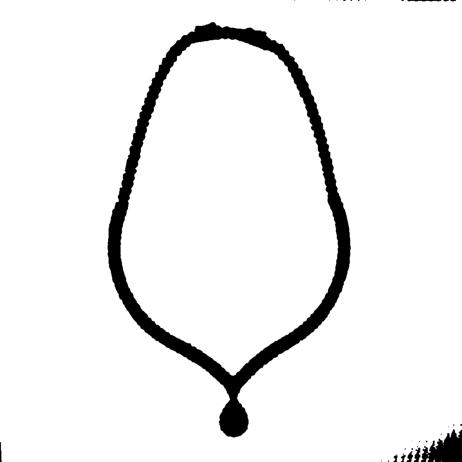

In [37]:
first_mask="/kaggle/working/mask_image.jpg"
# image_path = "/kaggle/input/jewelry/OSN23015_3.jpg"
mask = Image.open(first_mask)
mask

  0%|          | 0/49 [00:00<?, ?it/s]

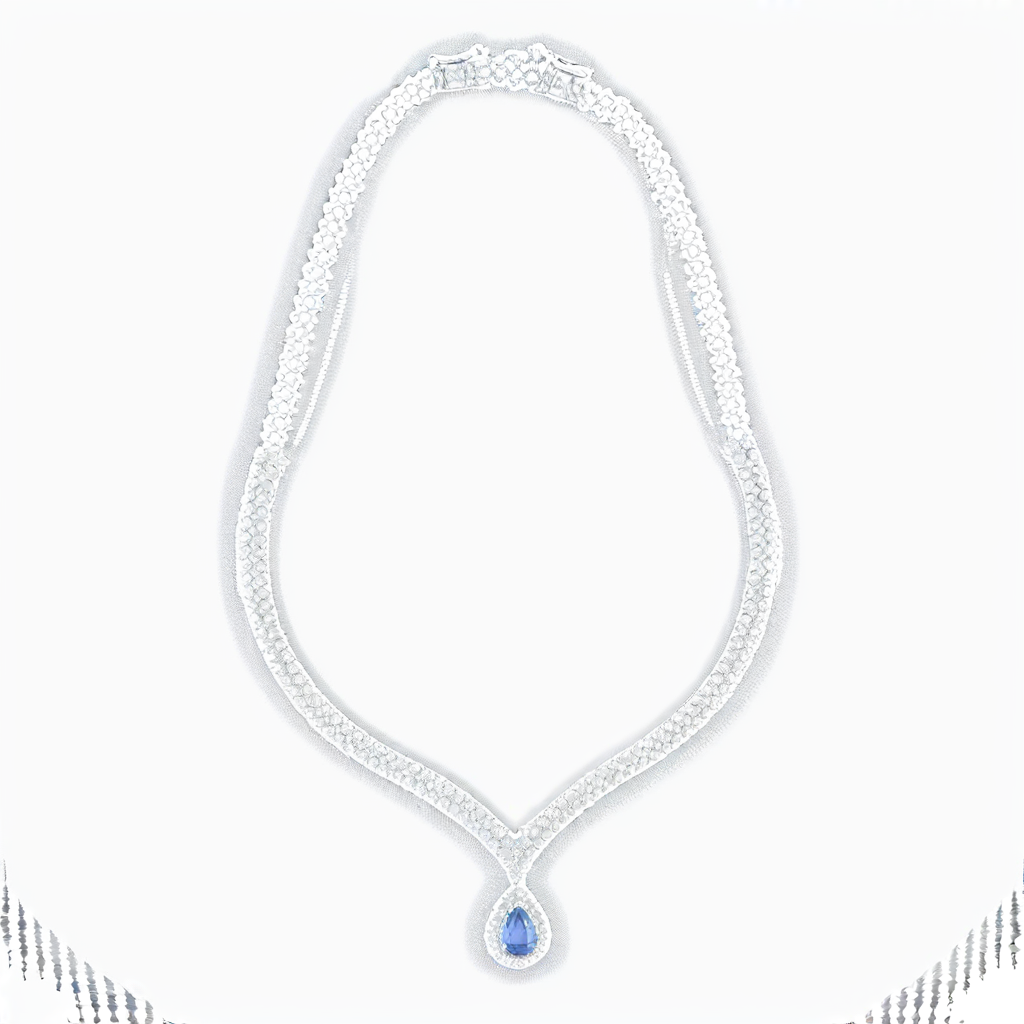

In [ ]:
# Run the inpainting pipeline
output = pipe(prompt=prompt, negative_prompt = neg_prompt,image=image, mask_image=mask)
result_image = output.images[0]
result_image

In [7]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

pipe = AutoPipelineForInpainting.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16"
)
pipe.enable_model_cpu_offload()
pipe.to("cuda")

/opt/conda/lib/python3.10/site-packages/diffusers/models/vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
/opt/conda/lib/python3.10/site-packages/diffusers/models/vq_model.py:25: FutureWarning: `VQModel` is deprecated and will be removed in version 0.31. Importing `VQModel` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQModel`, instead.
  deprecate("VQModel", "0.31", deprecation_message)


model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
It seems like you have activated model offloading by calling `enable_model_cpu_offload`, but are now manually moving the pipeline to GPU. It is strongly recommended against doing so as memory gains from offloading are likely to be lost. Offloading automatically takes care of moving the individual components vae, text_encoder, text_encoder_2, tokenizer, tokenizer_2, unet, image_encoder, feature_extractor, scheduler to GPU when needed. To make sure offloading works as expected, you should consider moving the pipeline back to CPU: `pipeline.to('cpu')` or removing the move altogether if you use offloading.


StableDiffusionXLInpaintPipeline {
  "_class_name": "StableDiffusionXLInpaintPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "requires_aesthetics_score": false,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
model_path = "stabilityai/stable-diffusion-xl-base-1.0"

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading the Stable Diffusion Model with ControlNet
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(model_path, controlnet=controlnet, torch_dtype=torch.float16
)

# Loading the fastest diffusion model schedulers called UniPCMultistepScheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Move the pipeline to GPU
pipe.to(device)

# Note: When running enable_model_cpu_offload, do not manually move the pipeline to GPU with .to("cuda") - once CPU offloading is enabled, the pipeline automatically takes care of GPU memory management
pipe.enable_model_cpu_offload()

In [4]:
from PIL import Image, ImageOps
import numpy as np
import cv2


def get_canny_image(image):
  image = np.array(image)

  low_threshold = 100
  high_threshold = 50

  image = cv2.Canny(image, low_threshold, high_threshold)
  image = image[:, :, None]
  image = np.concatenate([image, image, image], axis=2)
  canny_image = Image.fromarray(image)
  return canny_image

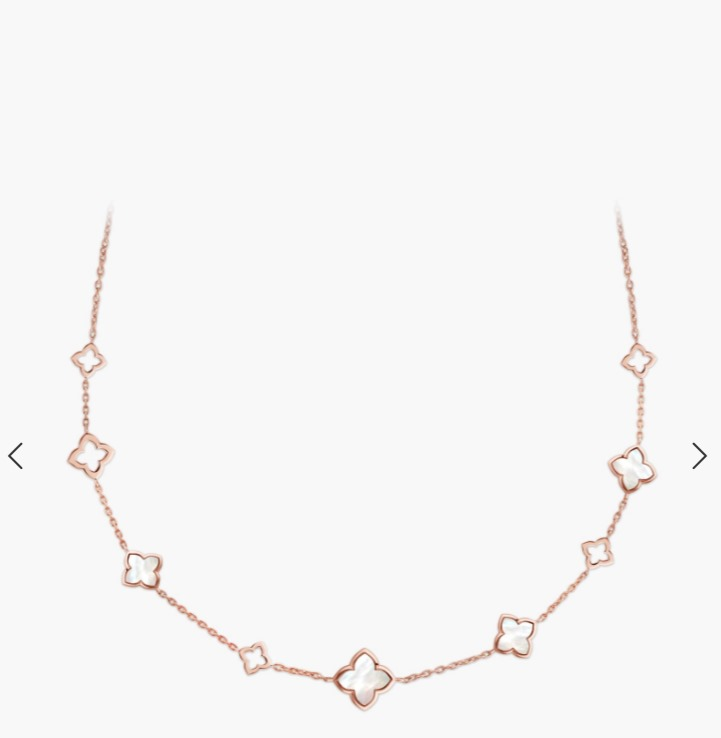

In [16]:
image

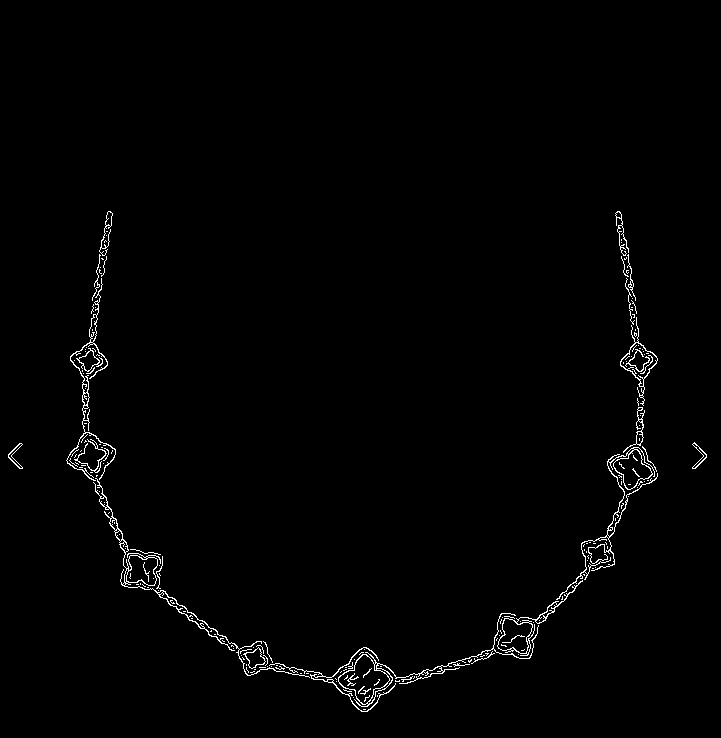

In [7]:
# Get the Canny edge image
init_image = get_canny_image(image)
init_image

In [10]:
# import cv2
# # image = cv2.imread(init_image)
# invert = cv2.bitwise_not(init_image) # OR
# # invert = 255 - image
# invert

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'bitwise_not'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


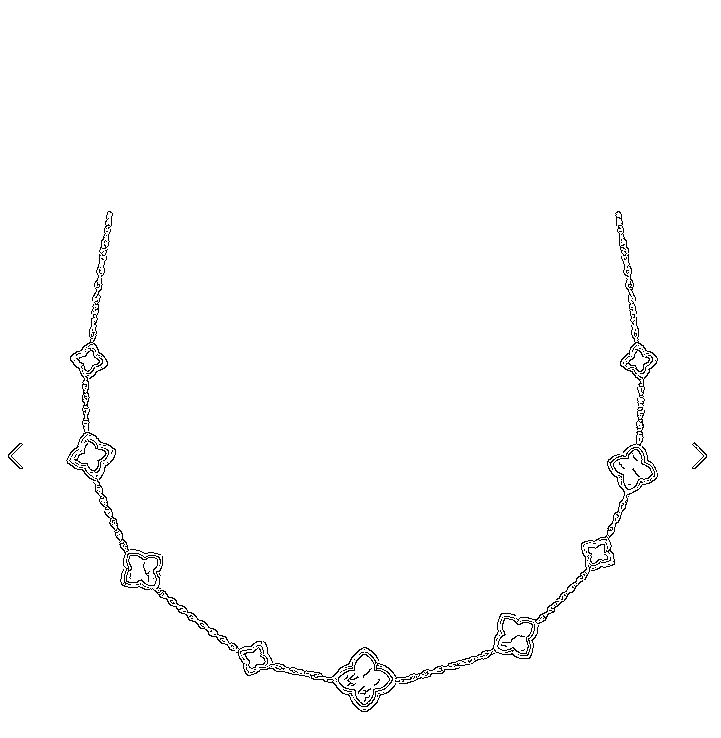

In [12]:
from PIL import Image, ImageOps

# Load the image
# img_path = "path_to_your_image.png"  # Replace with the actual path to your image
# image = Image.open(init_image)

# # Convert to grayscale if not already
# if image.mode != 'L':
#     image = image.convert('L')

# Invert the image
inverted_image = ImageOps.invert(init_image)
inverted_image

In [7]:
# image_url = r"/kaggle/input/jewelry/WhatsApp Image 2024-07-16 at 16.43.56_ce3e362a.jpg"
outputs = generator(image_url, points_per_batch = 256)
outputs

In [9]:
import torch
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

# # Load the image and mask image
# image_path = r"C:\Users\Aditya\Downloads\istockphoto-1443562748-612x612.jpg"  # Update this path
# mask_image_path = r"C:\Users\Aditya\Downloads\output.png"  # Update this path

In [19]:
# Run the inpainting pipeline
output = pipe(prompt=prompt, negative_prompt = neg_prompt,image=image, mask_image=first_mask,guidance_scale=7.5)
result_image = output.images[0]
result_image

RuntimeError: "compute_indices_weights_nearest" not implemented for 'Bool'

In [20]:
# Run the inpainting pipeline
output = pipe(prompt=prompt, negative_prompt = neg_prompt,image=image, mask_image=first_mask,guidance_scale=7.5)
result_image = output.images[0]
result_image

RuntimeError: "compute_indices_weights_nearest" not implemented for 'Bool'

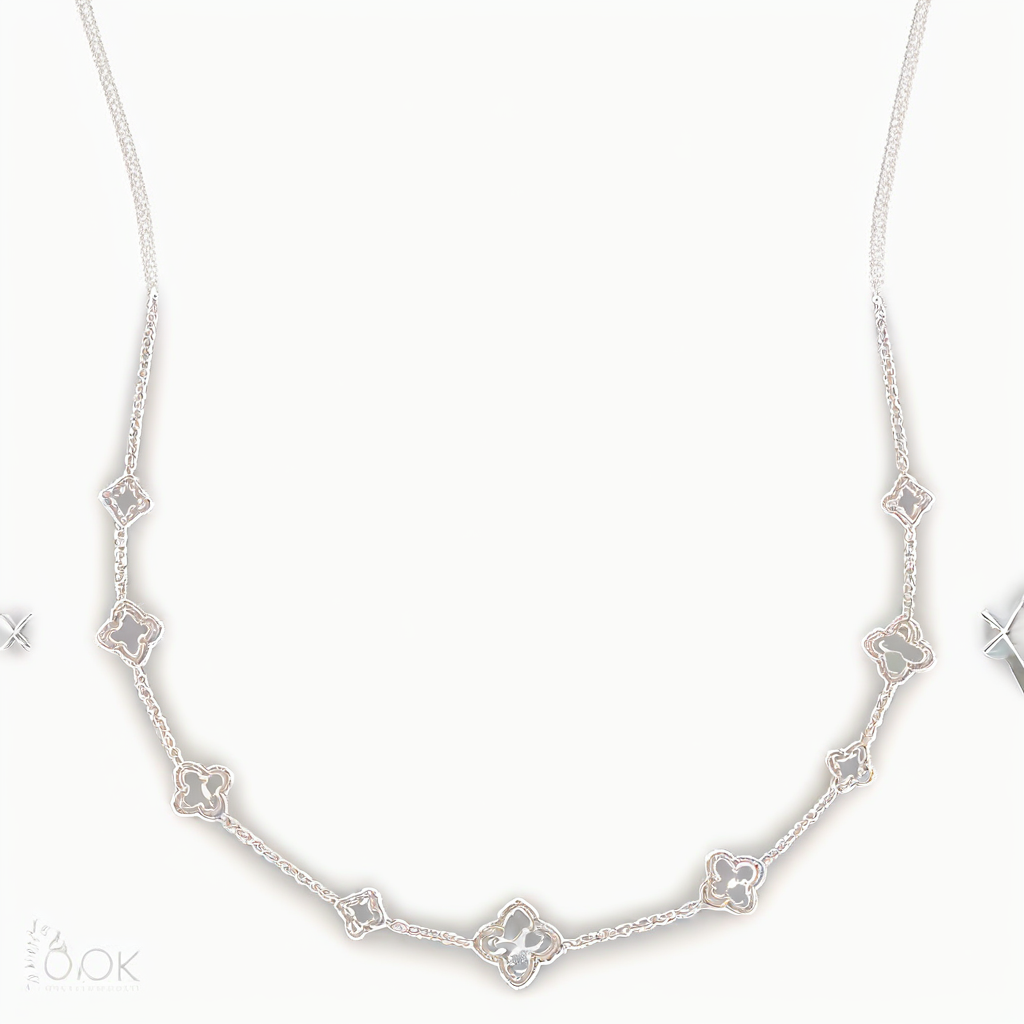

In [20]:
result_image

  0%|          | 0/50 [00:00<?, ?it/s]

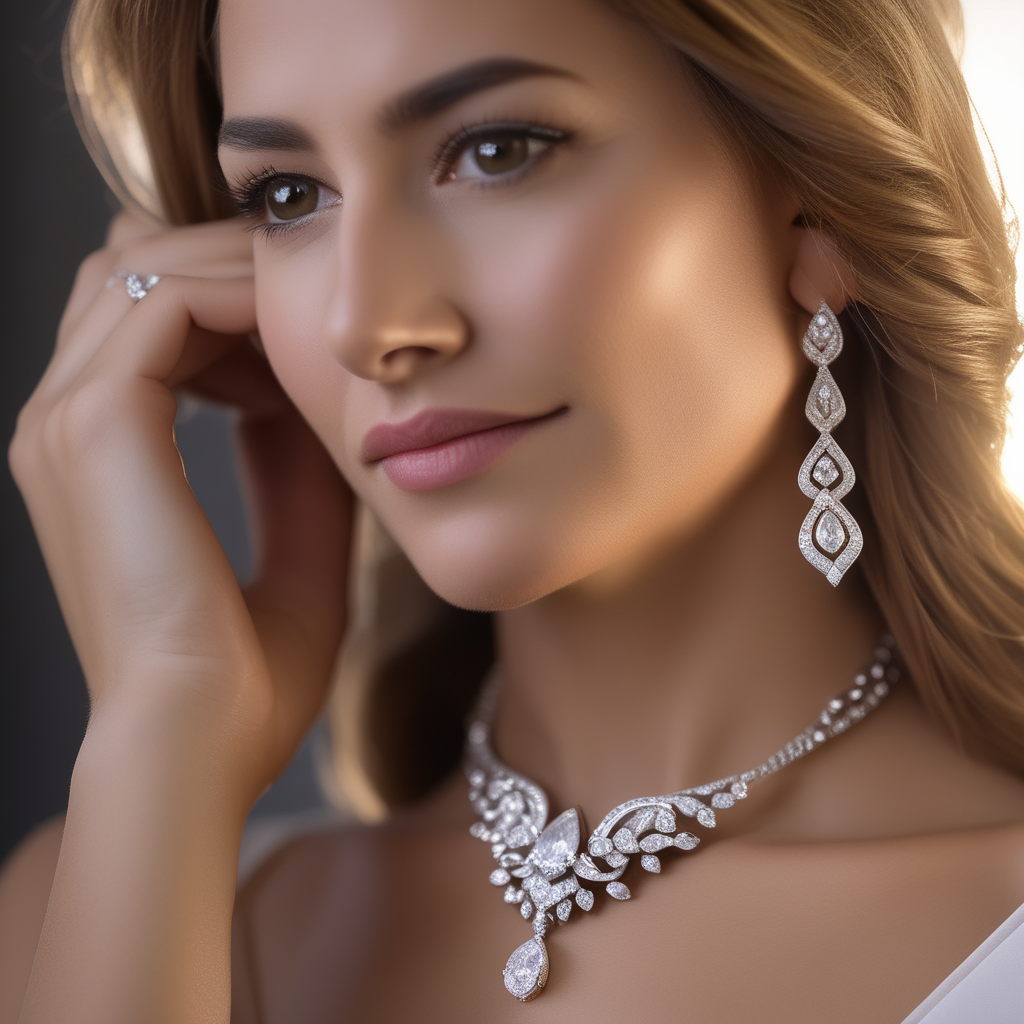

In [10]:
prompt = '''Careful composition in 4K accentuates opulent jewelry. Focused on the necklace, diamonds catch and reflect light, radiating a glow. 
Model's skin provides a warm backdrop, emphasizing the piece. Shallow depth of field ensures sharp focus on the necklace, with the background blurred,
drawing the viewer's eye to the jewelry.Do not change the desing'''
neg_prompt = "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"

# Process the image with the prompt
result = pipe(prompt=prompt, image=init_image, negative_prompt=neg_prompt, guidance_scale=7.5, num_inference_steps=50).images[0]
result

  0%|          | 0/50 [00:00<?, ?it/s]

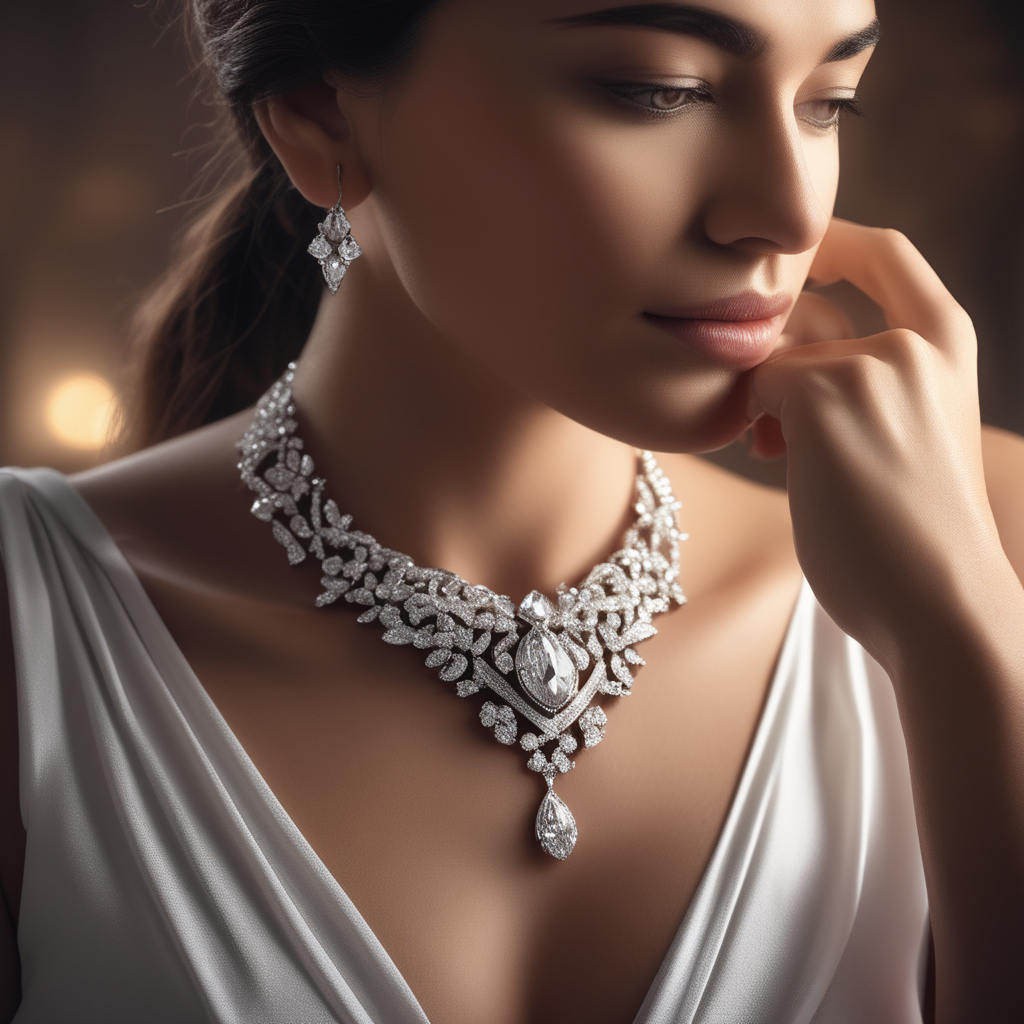

In [11]:
prompt = '''Careful composition in 4K accentuates opulent jewelry. Focused on the necklace, diamonds catch and reflect light, radiating a glow. 
Model's skin provides a warm backdrop, emphasizing the piece. Shallow depth of field ensures sharp focus on the necklace, with the background blurred,
drawing the viewer's eye to the jewelry.Do not change the desing'''
neg_prompt = "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"

# Process the image with the prompt
result = pipe(prompt=prompt, image=init_image, negative_prompt=neg_prompt, num_inference_steps=50).images[0]
result

  0%|          | 0/50 [00:00<?, ?it/s]

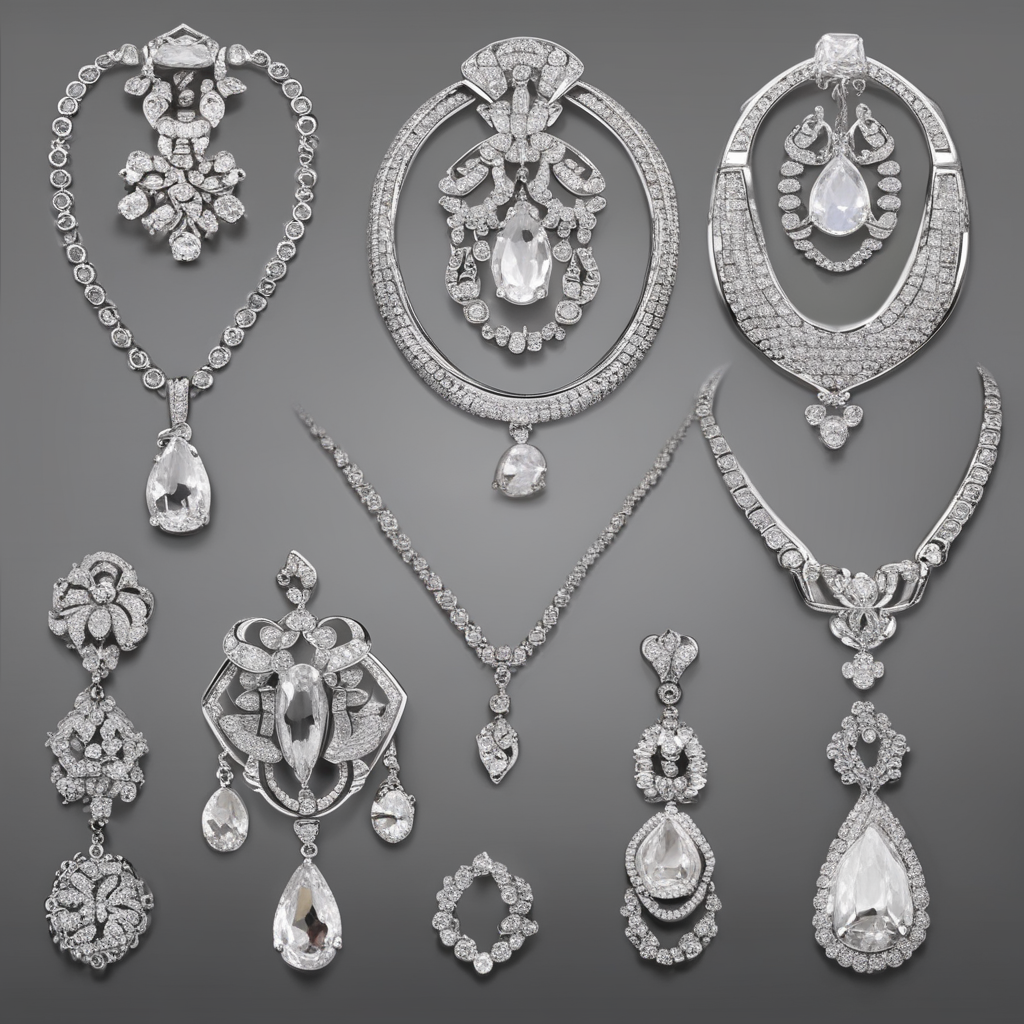

In [13]:
prompt = '''understand input design of jewelry and generate background for it '''
neg_prompt = "Inconsistent colors, distorted image, clumsy design, chaotic elements, mismatched aesthetics, unclean and fuzzy patterns, same color scheme, ugly patterns, varied artistic style"

# Process the image with the prompt
result = pipe(prompt=prompt, image=init_image, negative_prompt=neg_prompt, guidance_scale=5, num_inference_steps=50).images[0]
result